In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("visual_12Nov_Pict_.pdf")
#pdf2 = matplotlib.backends.backend_pdf.PdfPages("visual_result_4Nov_New.pdf")

In [2]:
excel_file='Input Files/Sample 9a/Flight Schedule 12 Nov.xlsx'
Nov3=pd.read_excel(excel_file)

In [3]:

Nov3.columns

Index(['TABAID', 'TABBID', 'INFLT', 'INDEP', 'INDEP_CITY', 'INDEP_REG',
       'INARR', 'INRTAIST', 'INATAIST', 'INARRDELAY', 'DEPDATEIST',
       'DEPDATEUTC', 'FLTNO', 'TAIL', 'ACF_CODE', 'BODY', 'DI', 'XLDL', 'DEP',
       'DEP_CITY', 'DEP_REG', 'DEP_CTRY', 'ARR', 'ARR_CITY', 'ARR_REG',
       'ARR_CTRY', 'STDIST', 'RTDIST', 'OUTIST', 'OFFIST', 'DEP_DELAY',
       'STAIST', 'RTAIST', 'ONIST', 'INIST', 'ARR_DELAY'],
      dtype='object')

In [4]:
routes={}
for i in range(len(Nov3["TAIL"])):
    routes[Nov3["TAIL"][i]]=[]
print(routes.keys())
print(len(routes))

dict_keys(['VTICD', 'VTICX', 'VTICF', 'VTICG', 'VTICH', 'VTICN', 'VTICO', 'VTICB', 'VTICQ', 'VTXDD', 'VTXES', 'VTXEP', 'VTXEI', 'VTXEX', 'VTXEF', 'VTXEG', 'VTXEH', 'VTXEC', 'VTXEJ', 'VTXEK', 'VTXEL', 'VTXEM', 'VTXEN', 'VTXEO', 'VTXEB', 'VTXEQ', 'VTXER', 'VTXEA', 'VTXET', 'VTXEU', 'VTBBP', 'VTBBD', 'VTBBJ', 'VTBBK', 'VTBBL', 'VTBBM', 'VTBBO', 'VTBBQ', 'VTBBT', 'VTBBE', 'VTAIP', 'VTAII', 'VTAIF', 'VTAIG', 'VTAIH', 'VTAIO', 'VTAIB', 'VTAIR', 'VTAIA'])
49


In [5]:
for i in range(len(Nov3["TAIL"])):   
    routes[Nov3["TAIL"][i]].append([Nov3["DEP"][i], Nov3["RTDIST"][i], Nov3["ARR"][i], Nov3["RTAIST"][i], Nov3["FLTNO"][i]])

In [6]:
for c in routes.keys():
    routes[c].sort(key=lambda x: x[1])
print(routes[list(routes.keys())[0]])

[['DEL', '12-Nov-2020 07:50', 'IXL', '12-Nov-2020 09:30', 'ZZ0445'], ['IXL', '12-Nov-2020 10:20', 'IXC', '12-Nov-2020 11:30', 'ZZ0445'], ['IXC', '12-Nov-2020 12:30', 'DEL', '12-Nov-2020 13:35', 'ZZ0445'], ['DEL', '12-Nov-2020 17:25', 'VNS', '12-Nov-2020 18:55', 'ZZ0427'], ['VNS', '12-Nov-2020 20:40', 'DEL', '12-Nov-2020 22:25', 'ZZ0428']]


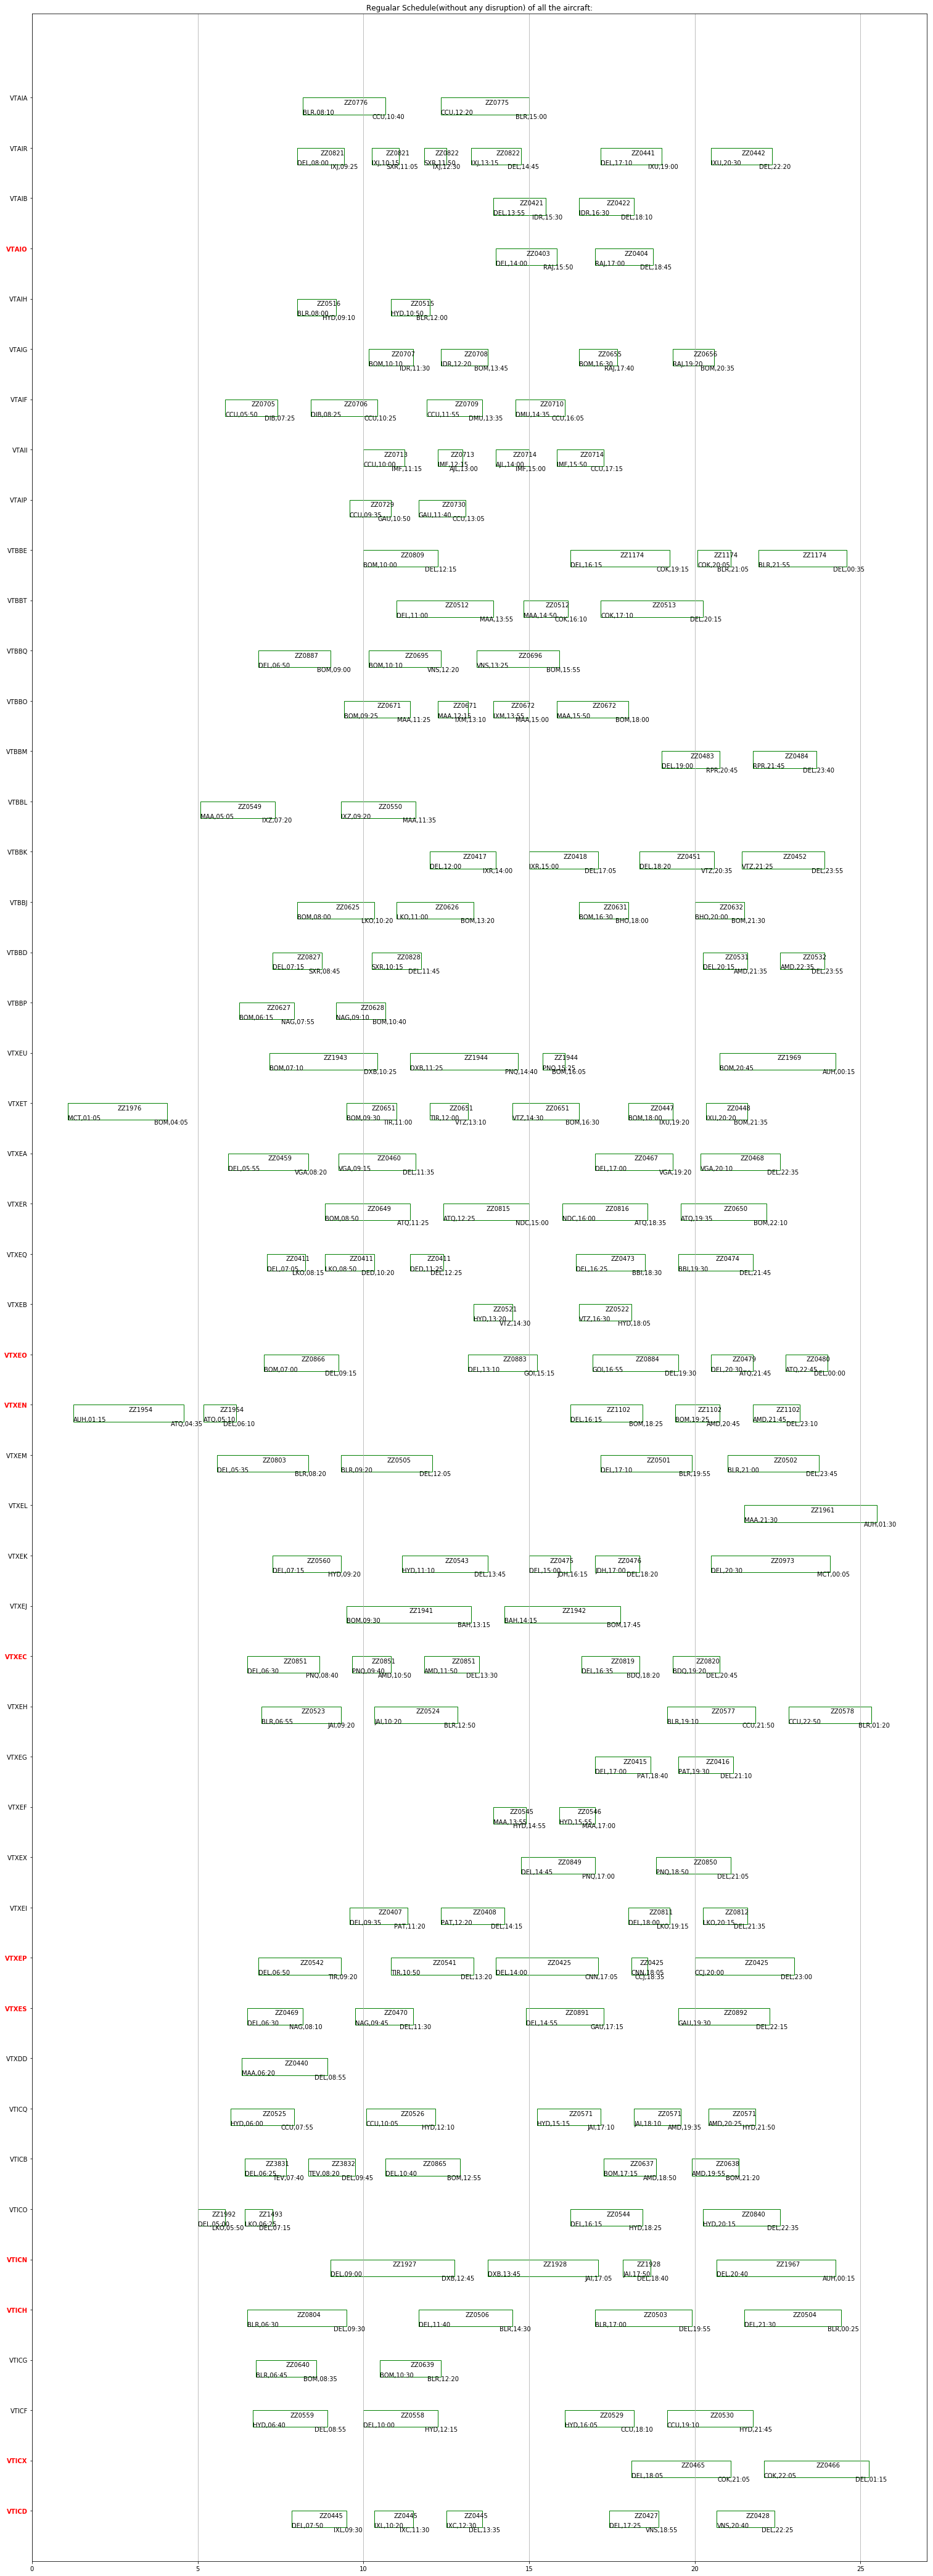

In [7]:
sw_aircraft = " VTXEN, VTAIO, VTICD, VTICX, VTICH, VTICN, VTXES, VTXEP, VTXEC, VTXEO".split(',')
sw_aircraft = [i.strip() for i in sw_aircraft]
sw_ind = [i for i in range(len(routes.keys())) if list(routes.keys())[i] in sw_aircraft]
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(26, 76))
ax = fig.add_subplot(111)
ctr = 1
for c in routes.keys():
    A = []
    A_ = []
    
    for i in range(len(routes[c])):
        st = routes[c][i][1].split()[1]
        h = int(st[0:2])
        m = int(st[3:])
        A.append(h+m/60)
        st2 = routes[c][i][3].split()[1]
        h2 = int(st2[0:2])
        m2 = int(st2[3:])
        if h2<h:
            A.append(24+h2+m2/60)
        else:
            A.append(h2+m2/60)
        A_.append((routes[c][i][0], st, routes[c][i][2], st2, routes[c][i][4]))    
        
    B = [ctr]*int(len(A))
    for i in range(len(A)):
        if i%2==0:
            ax.add_patch(matplotlib.patches.Rectangle((A[i], B[i]), A[i+1]-A[i], 0.5,fc ='none',color ='green'))
            ax.annotate('%s,%s' %(A_[int(i/2)][0],A_[int(i/2)][1]), xy=(A[i], B[i]))
            ax.annotate('%s,%s' %(A_[int(i/2)][2],A_[int(i/2)][3]), xy=(A[i+1]-0.4, B[i+1]-0.12))
            ax.annotate('%s' %A_[int(i/2)][4], xy=((A[i+1]+A[i])/2, B[i+1]+0.3))
    if ctr==99:
        print(A)
    ctr+=1.5
plt.title("Regualar Schedule(without any disruption) of all the aircraft:")
ax.xaxis.grid(True)
plt.xlim([0, 27]) 
plt.ylim([0, 76]) 
plt. yticks([1.5*i for i in range(1,1+len(routes.keys()))], list(routes.keys()))
labels = ax.get_yticklabels()
for i in sw_ind:
    labels[i].set_color("red")
    labels[i].set_weight('bold')
plt.show()

                  


In [8]:
pdf.savefig(fig)
pdf.close()

In [8]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
#pdf2 = matplotlib.backends.backend_pdf.PdfPages("visual_result_4Nov_new.pdf")

In [9]:
routes = {}
with open("OutputNov8ScenarioC.txt",'r') as f1:
    lines = f1.readlines()
    for l in range(len(lines)):
        if lines[l][0]=='V':
            a = lines[l][0:5]
            routes[a] = []
            i = l+1
            while i<len(lines) and lines[i][0]!='V' and len(lines[i])>4:
                f = lines[i].split()
                routes[a].append([f[2], f[4], f[3], f[5], f[1]])
                i+=1
#for c in routes.keys():
#    routes[c].sort(key=lambda x: x[1])
print(routes['VTICD'])

[['DEL', '7:40', 'CJB', '11:0', 'ZZ0547'], ['CJB', '12:0', 'DEL', '15:0', 'ZZ0548'], ['DEL', '17:25', 'VNS', '18:55', 'ZZ0427'], ['VNS', '20:40', 'DEL', '22:25', 'ZZ0428']]


['DEL', '18:5', 'COK', '21:5', 'ZZ0465']
['COK', '22:5', 'DEL', '25:15', 'ZZ0466']
['DEL', '12:0', 'IXR', '14:0', 'ZZ0417']
['IXR', '15:0', 'DEL', '17:5', 'ZZ0418']
['DEL', '20:30', 'MCT', '24:5', 'ZZ0973']
['DEL', '7:40', 'CJB', '11:0', 'ZZ0547']
['CJB', '12:0', 'DEL', '15:0', 'ZZ0548']
['DEL', '17:25', 'VNS', '18:55', 'ZZ0427']
['VNS', '20:40', 'DEL', '22:25', 'ZZ0428']
['MAA', '12:15', 'IXM', '13:10', 'ZZ0671']
['IXM', '13:55', 'MAA', '15:0', 'ZZ0672']
['MAA', '21:30', 'DEL', '24:20', 'ZZ0554']
['HYD', '6:0', 'CCU', '7:55', 'ZZ0525']
['CCU', '10:5', 'HYD', '12:10', 'ZZ0526']
['HYD', '13:20', 'VTZ', '14:30', 'ZZ0521']
['VTZ', '16:30', 'HYD', '18:5', 'ZZ0522']
['BOM', '7:0', 'DEL', '9:15', 'ZZ0866']
['DEL', '17:0', 'PAT', '18:40', 'ZZ0415']
['PAT', '19:30', 'DEL', '21:10', 'ZZ0416']
['JAI', '2:30', 'DEL', '3:30', 'ZZ1928']
['DEL', '7:15', 'SXR', '8:45', 'ZZ0827']
['SXR', '10:15', 'DEL', '11:45', 'ZZ0828']
['DEL', '14:0', 'CNN', '17:5', 'ZZ0425']
['CNN', '18:5', 'CCJ', '18:35', 'ZZ0425

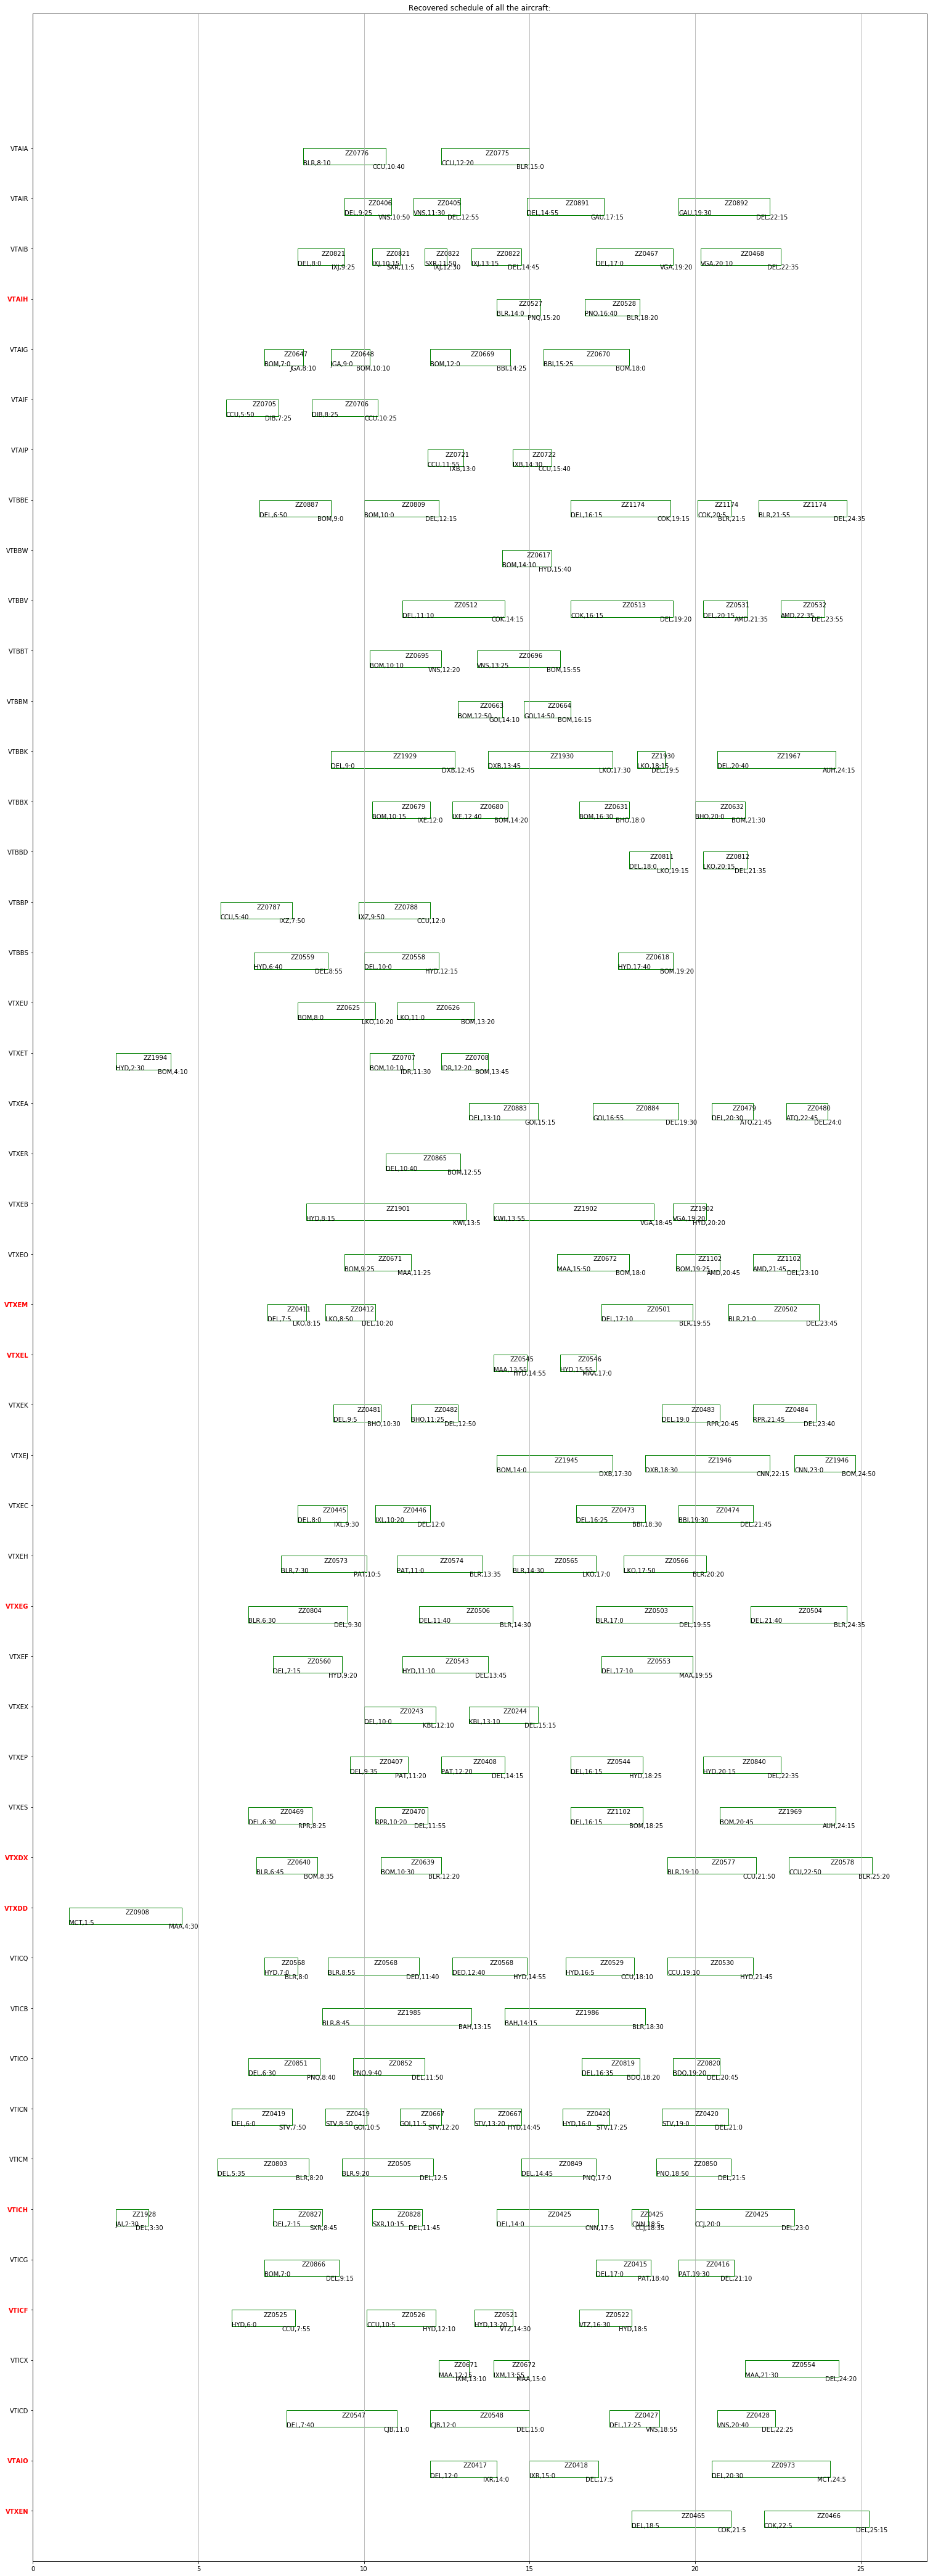

In [10]:

from matplotlib.patches import Rectangle
fig2 = plt.figure(figsize=(26, 76))
ax = fig2.add_subplot(111)
ctr = 1
for c in routes.keys():
    A = []
    A_ = []
    
    for i in range(len(routes[c])):
        print(routes[c][i])
        st = routes[c][i][1]
        h = int(st[0:2]) if st[1]!=':' else int(st[0])
        m = int(st[3:]) if st[1]!=':' else int(st[2:])
        A.append(h+m/60)
        st2 = routes[c][i][3] 
        h2 = int(st2[0:2]) if st2[1]!=':' else int(st2[0])
        m2 = int(st2[3:]) if st2[1]!=':' else int(st2[2:])
        if h2<h:
            A.append(24+h2+m2/60)
        else:
            A.append(h2+m2/60)
        A_.append((routes[c][i][0], st, routes[c][i][2], st2, routes[c][i][4]))    
        
    B = [ctr]*int(len(A))
    for i in range(len(A)):
        if i%2==0:
            ax.add_patch(matplotlib.patches.Rectangle((A[i], B[i]), A[i+1]-A[i], 0.5,fc ='none',color ='green'))
            ax.annotate('%s,%s' %(A_[int(i/2)][0],A_[int(i/2)][1]), xy=(A[i], B[i]))
            ax.annotate('%s,%s' %(A_[int(i/2)][2],A_[int(i/2)][3]), xy=(A[i+1]-0.4, B[i+1]-0.12))
            ax.annotate('%s' %A_[int(i/2)][4], xy=((A[i+1]+A[i])/2, B[i+1]+0.3))
    ctr+=1.5
plt.title("Recovered schedule of all the aircraft:")
plt.xlim([0, 27]) 
plt.ylim([0, 76]) 
ax.xaxis.grid(True)
plt. yticks([1.5*i for i in range(1,1+len(routes.keys()))], list(routes.keys()))
labels = ax.get_yticklabels()
for i in sw_ind:
    labels[i].set_color("red")
    labels[i].set_weight('bold')

    
plt.show()

pdf.savefig(fig)
pdf.savefig(fig2)
pdf.close()

In [41]:
pdf.close()

AttributeError: 'NoneType' object has no attribute 'finalize'

In [32]:
print(sw_aircraft)

['VTICD', 'VTXDD', 'VTXDX', 'VTXEP', 'VTXEX', 'VTXEG', 'VTXEM', 'VTXEO', 'VTXEA', 'VTBBS', 'VTBBW', 'VTAIH', 'VTAIR']
